In [1]:
#from collections import defaultdict
#from pathlib import Path
import json

import os 
import time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russell_df = pd.read_csv('russell_3000_index.csv')

ticker_list = russell_df['Ticker']

In [3]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [4]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker XTSLA threw an error
Ticker USD threw an error
Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
Ticker MSFUT threw an error
Ticker ESU2 threw an error
Ticker RTYU2 threw an error
This code took 34.07056736946106 seconds


In [5]:
starter_df.reset_index(inplace=True,drop=True)

In [39]:
#removing tickers with known mistakes
mistakes_df = pd.read_csv('mistakes.csv').drop(columns='Unnamed: 0')
mistakes_df['ticker'].value_counts()

starter_df = starter_df[starter_df['ticker'].isin(set(mistakes_df['ticker'])) == False].reset_index(drop=True)

starter_df.head(3)

id      cik ticker                 name  \
0  73b3a60ba203743c008330c96b7d8b66  1090872      A             Sam Raha   
1  97393f60cd9f321650e472673daaa70c  1090872      A  Michael R. McMullen   
2  83b9cc2bca477fe8ce23e0ab56e70c66  1090872      A        Jacob Thaysen   

                                            position  year   salary  bonus  \
0  Senior Vice President, President Diagnostics a...  2021   563500      0   
1                            Chief Executive Officer  2021  1280000      0   
2  Senior Vice President, President Life Sciences...  2021   625000      0   

   stockAwards  optionAwards  nonEquityIncentiveCompensation  \
0      1541332             0                          738536   
1      9165390             0                         3149714   
2      1812285             0                          897589   

   otherCompensation     total  changeInPensionValueAndDeferredEarnings  \
0              33534   3262887                                      NaN   
1              77512  15967631                                      NaN   
2              13684   3802349                                      NaN   

     CEO    CFO  Interim  
0  False  False    False  
1   True  False    False  
2  False  False    False

In [41]:
starter_df['salary'].max()

20000000

In [42]:
mistakes_df

id      cik ticker                 name  \
0    1e4ef9a59c291947b10235e1cca11435   318300   PEBO      Deborah K. Hill   
1    1e4ef9a59c291947b10235e1cca11435   318300   PEBO      Deborah K. Hill   
2    7abfbdf1e47c867e207a31977e4e9ed3  1262976   CMPR     Maarten Wensveen   
3    cf335773b422f0d4a104f0c5eaa87580   912595    MAA  H. Eric Bolton, Jr.   
4    0d946ec86fe6c30743d0da932455dec2   912595    MAA  H. Eric Bolton, Jr.   
..                                ...      ...    ...                  ...   
111  dd7a4985373e9364a8fec2c41c72e8f4   704159   VBIV   Curtis A. Lockshin   
112  a2818e0667791662c7922e9e6b32b97b   108772    XRX      Ursula M. Burns   
113  81f4ad678d6c0a0c88cecb13f8ec5fac  1084580    JEF      Chairman of the   
114  e8c279d81d2a3854934aa30b5be176dc  1084580    JEF              related   
115  1307325ac520c0830a1abd5e80642f73   704159   VBIV      James J. Martin   

                                              position  year       salary  \
0    Executive Vice President, Consumer and Busines...  2008  18200060667   
1    Executive Vice President, Consumer and Busines...  2008  18200060667   
2    Executive Vice President and Chief Technology ...  2020     53076942   
3                                        CEO all years  2012     49487881   
4                                        CEO all years  2011     45935009   
..                                                 ...   ...          ...   
111                            Chief Executive Officer  2015     10749996   
112               Chairman and Chief Executive Officer  2010     10500001   
113                                Executive Committee  2011      9749998   
114                 Total Total Peregrine C. Broadbent  2011      9749998   
115                            Chief Financial Officer  2015      9499998   

     bonus  stockAwards  optionAwards  nonEquityIncentiveCompensation  \
0    30000        30135          4436                               0   
1    30000        30135          4436                               0   
2        0      2554745             0                               0   
3      500       248000             0                          992000   
4      500     34916766             0                          729455   
..     ...          ...           ...                             ...   
111      0            0             0                               0   
112      0      7500009             0                         1693125   
113      0            0             0                               0   
114      0            0             0                               0   
115      0            0             0                               0   

     otherCompensation      total  changeInPensionValueAndDeferredEarnings  
0                10127     256698                                      NaN  
1                10127     256698                                      NaN  
2                33535    3119049                                      NaN  
3              1484642  175022523                                      NaN  
4              3345902  157193177                                      NaN  
..                 ...        ...                                      ...  
111                  0   10749996                                      NaN  
112             391716   13219308                                  2584458  
113                  0    9749998                                      NaN  
114                  0    9749998                                      NaN  
115                  0    9499998                                      NaN  

[116 rows x 14 columns]

In [43]:
ceo_title_list = ['CHIEF EXECUTIVE','CEO']
cfo_title_list = ['CHIEF FINANC','CFO']
interim_title_list = ['INTERIM','ACTING']

ceo_regstr = '|'.join(ceo_title_list)
cfo_regstr = '|'.join(cfo_title_list)
interim_regstr = '|'.join(interim_title_list)

# https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)
starter_df['Interim'] = starter_df['position'].str.upper().str.contains(interim_regstr)

In [44]:
ceo_df = starter_df[(starter_df['CEO']==True)]
ceo_df.reset_index(inplace=True)

ceo_2021_df = starter_df[(starter_df['CEO']==True) & (starter_df['year']==2021)]
ceo_2021_df.reset_index(inplace=True)

cfo_2021_df = starter_df[(starter_df['CFO']==True) & (starter_df['year']==2021)]
cfo_2021_df.reset_index(inplace=True)

In [45]:
ceo_df = ceo_df[(ceo_df['salary'] > 0) & (ceo_df['year'] > 2005)]

In [46]:
#https://www.statology.org/deciles-in-python/
percentile_ceo_2021 = np.percentile(ceo_df[ceo_df['year'] == 2021]['salary'], np.arange(0,100,5))
percentile_ceo_2020 = np.percentile(ceo_df[ceo_df['year'] == 2020]['salary'], np.arange(0,100,5))
percentile_ceo_2019 = np.percentile(ceo_df[ceo_df['year'] == 2019]['salary'], np.arange(0,100,5))
percentile_ceo_2018 = np.percentile(ceo_df[ceo_df['year'] == 2018]['salary'], np.arange(0,100,5))
percentile_ceo_2017 = np.percentile(ceo_df[ceo_df['year'] == 2017]['salary'], np.arange(0,100,5))
percentile_ceo_2016 = np.percentile(ceo_df[ceo_df['year'] == 2016]['salary'], np.arange(0,100,5))
percentile_ceo_2015 = np.percentile(ceo_df[ceo_df['year'] == 2015]['salary'], np.arange(0,100,5))
percentile_ceo_2014 = np.percentile(ceo_df[ceo_df['year'] == 2014]['salary'], np.arange(0,100,5))
percentile_ceo_2013 = np.percentile(ceo_df[ceo_df['year'] == 2013]['salary'], np.arange(0,100,5))
percentile_ceo_2012 = np.percentile(ceo_df[ceo_df['year'] == 2012]['salary'], np.arange(0,100,5))

data_list = [percentile_ceo_2012,percentile_ceo_2013,percentile_ceo_2014,percentile_ceo_2015,percentile_ceo_2016,percentile_ceo_2017,
            percentile_ceo_2018,percentile_ceo_2019,percentile_ceo_2020,percentile_ceo_2021]
index_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

percentile_df = pd.DataFrame(data_list,index=index_list,columns=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
percentile_df

0      5      10     15     20     25     30     35     40     45  \
2012   1 200000 300000 358993 407444 453811 500000 525000 567425 600000   
2013   1 200136 315000 375000 425000 475000 500000 547562 599039 626936   
2014   1 207711 316202 382027 436539 490000 520000 559259 600000 650000   
2015   1 231530 327805 390539 445000 493204 525000 575000 614054 650020   
2016   1 213499 333800 399753 450000 495000 526930 577854 625000 664657   
2017   1 196319 350000 407346 457569 500000 540000 600000 642000 693245   
2018   1 204954 350000 415230 472577 508865 550000 600000 645833 700000   
2019   1 212228 346212 408731 474700 500001 550000 599520 646539 700000   
2020   1 206250 318462 400000 452083 500000 540000 582950 619500 659860   
2021   1 234519 372587 449923 500000 543626 590075 628834 674646 720000   

         50     55     60     65     70      75      80      85      90  \
2012 661010 724403 769962 818750 890130  950028 1000000 1050000 1185208   
2013 685802 743442 791923 840336 900000  967785 1000000 1067509 1200000   
2014 700000 750000 800000 850000 906115  971250 1000000 1069239 1200000   
2015 700000 750000 800576 861154 916318  980000 1000000 1084378 1225379   
2016 705480 753548 800334 865228 931212  991317 1000000 1094680 1235945   
2017 726790 772888 825000 875878 929183  996000 1004345 1100000 1241442   
2018 739231 778910 834918 896154 945000  999985 1013277 1109040 1250000   
2019 750000 792590 841828 900000 950000  999999 1023692 1128158 1250000   
2020 706410 753846 800000 850000 908654  960577 1000467 1096486 1218750   
2021 757750 810687 852795 900732 962718 1000000 1047938 1140019 1250000   

          95  
2012 1424430  
2013 1450000  
2014 1459080  
2015 1478000  
2016 1481768  
2017 1429000  
2018 1460893  
2019 1498262  
2020 1417366  
2021 1488217

In [47]:
my_palette = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue','darkblue']
my_size = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5]
my_marker = ['o','o','o','o','o','o','o','o','o','o']

plt.figure(figsize=(16,8))
sns.scatterplot(data=percentile_df.drop(columns=[0]).T,
                palette=my_palette,
                markers=my_marker,
                size_order=my_size)

<AxesSubplot:>

### BoxPlots for CEO Pay Components
#### Salary

In [48]:
ceo_df['year'] = ceo_df['year'].astype('category')

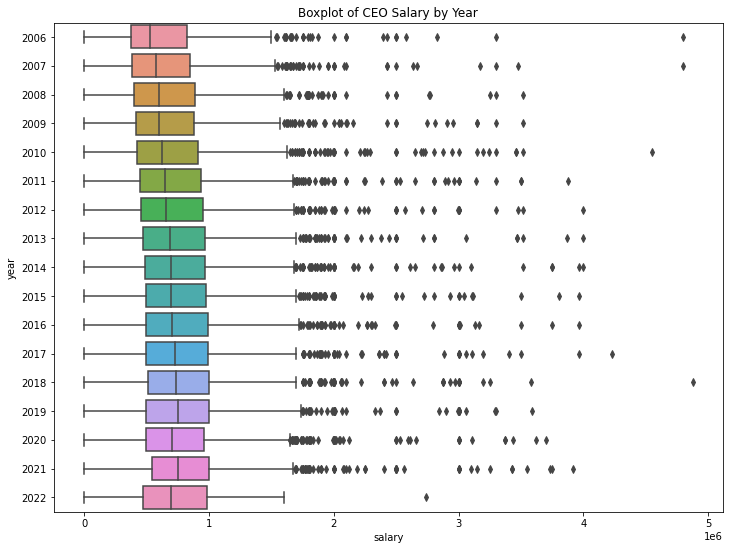

In [49]:
plt.figure(figsize=(12,9))
sns.boxplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')
plt.title("Boxplot of CEO Salary by Year");

In [50]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')

<AxesSubplot:xlabel='salary', ylabel='year'>

<Figure size 864x216 with 0 Axes>

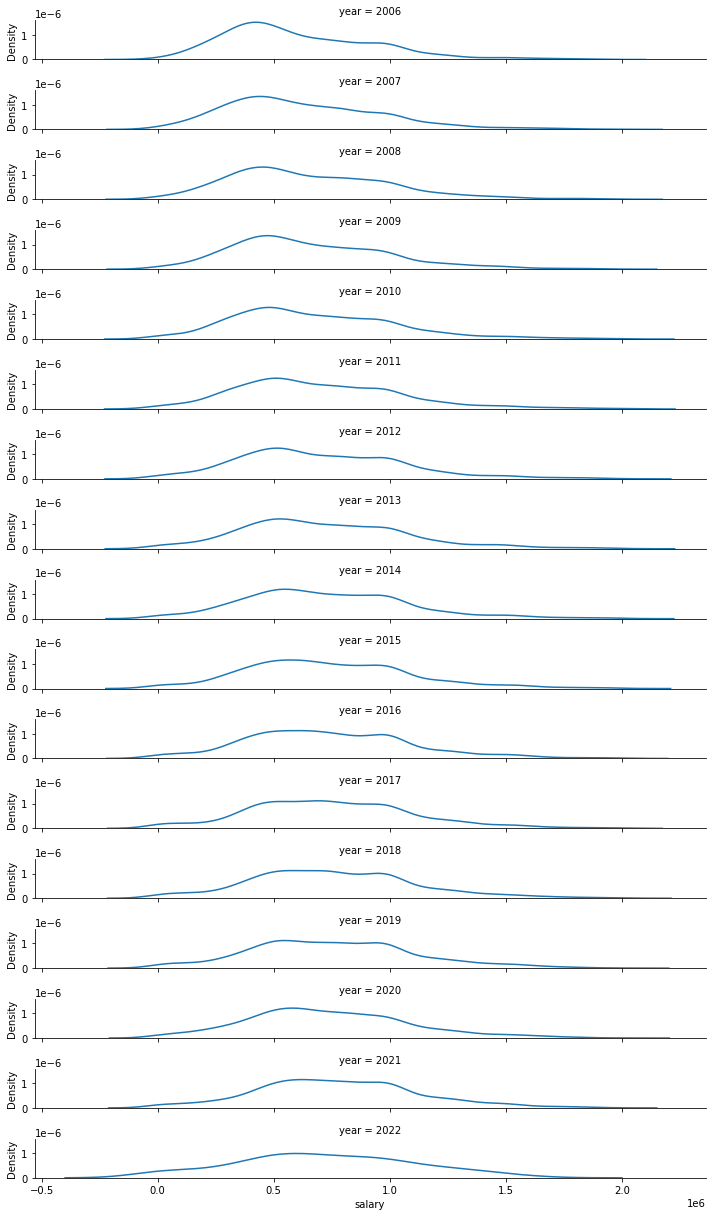

In [51]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['salary'] < 2000000], row='year',aspect=10,height=1)
g.map(sns.kdeplot, 'salary')#,bins=50,kde=True,stat='density')

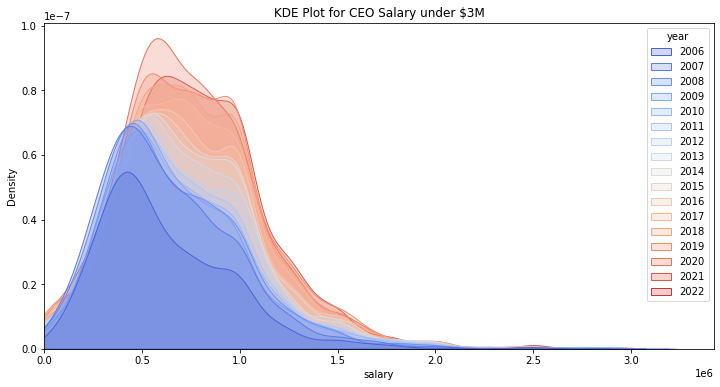

In [52]:
#sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 50000000],x='stockAwards',y='year')

plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[ceo_df['salary'] < 3000000], x='salary',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for CEO Salary under $3M')
plt.xlim(0,);

#### Stock Awards

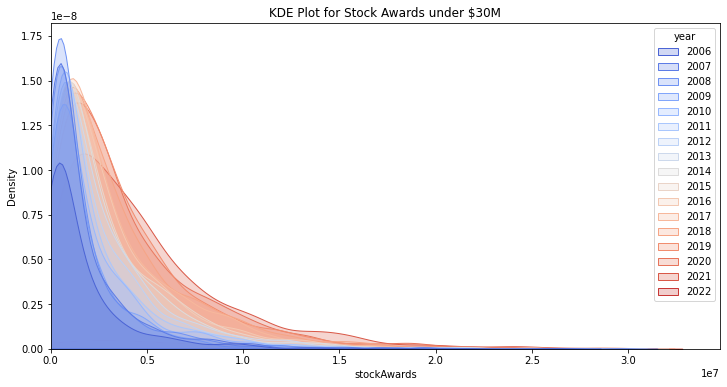

In [53]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['stockAwards'] < 30000000) & (ceo_df['stockAwards']>0)], x='stockAwards',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Stock Awards under $30M')
plt.xlim(0,);

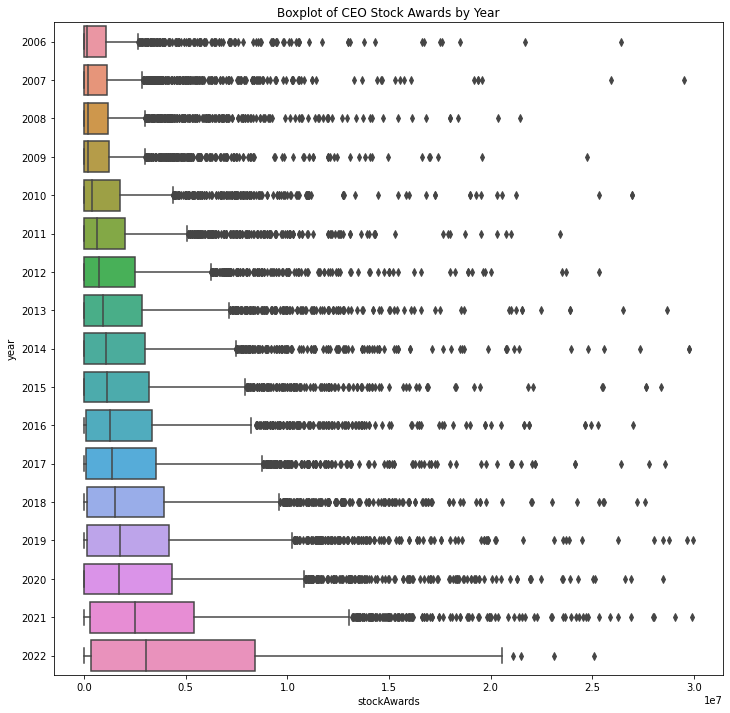

In [54]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')
plt.title('Boxplot of CEO Stock Awards by Year');

In [55]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['stockAwards'] < 30000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'stockAwards')

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

<AxesSubplot:xlabel='stockAwards', ylabel='year'>

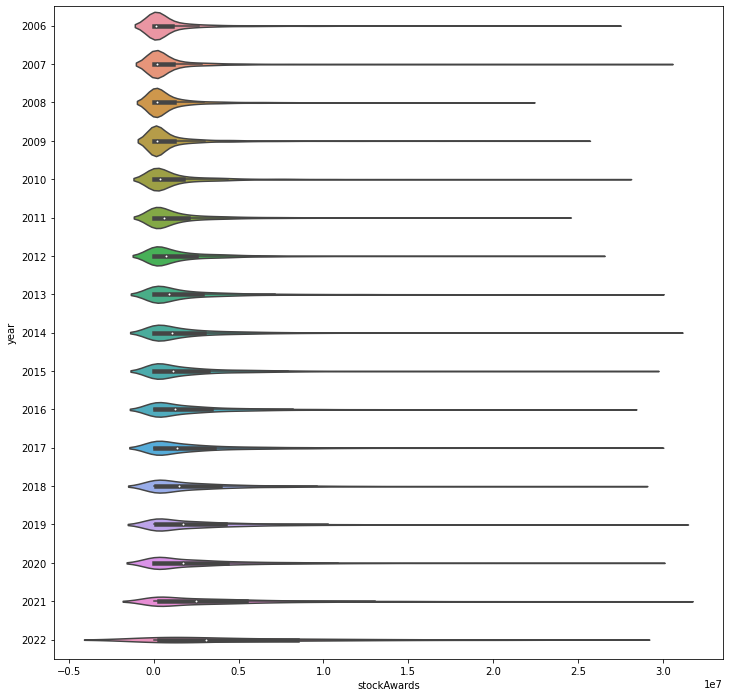

In [56]:
plt.figure(figsize=(12,12))
sns.violinplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')

#### Performance Bonus Awards

In [57]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['nonEquityIncentiveCompensation'] < 5000000) & (ceo_df['nonEquityIncentiveCompensation']>0)], 
            x='nonEquityIncentiveCompensation',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Performance Bonus under $5M')
plt.xlim(0,);

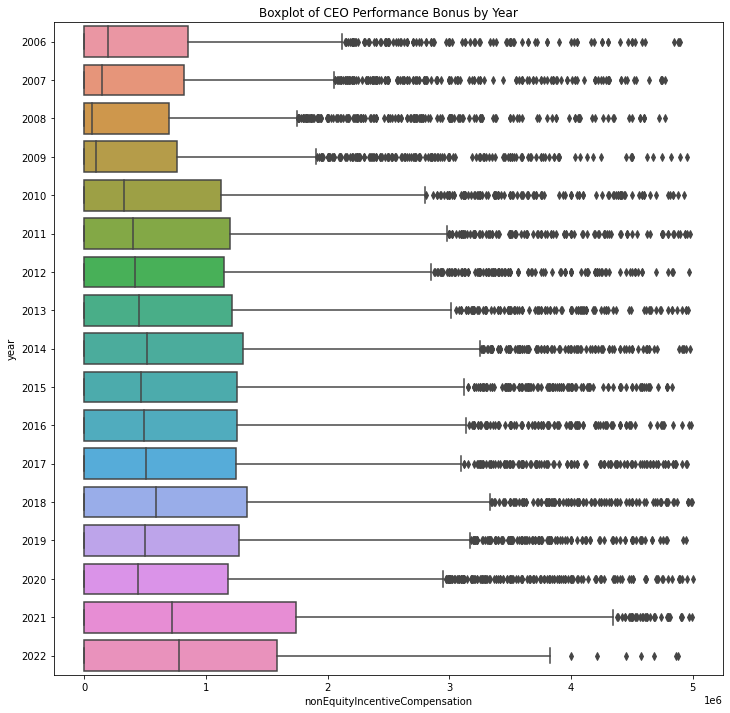

In [58]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.title('Boxplot of CEO Performance Bonus by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

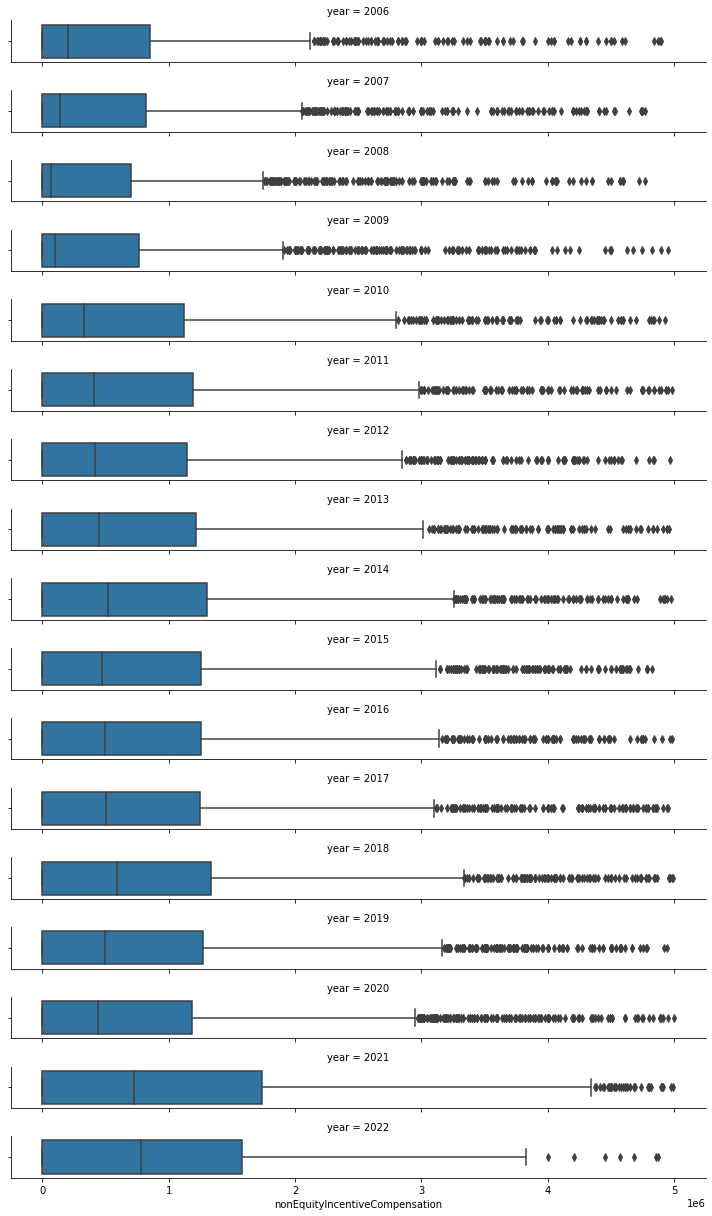

In [59]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'nonEquityIncentiveCompensation')

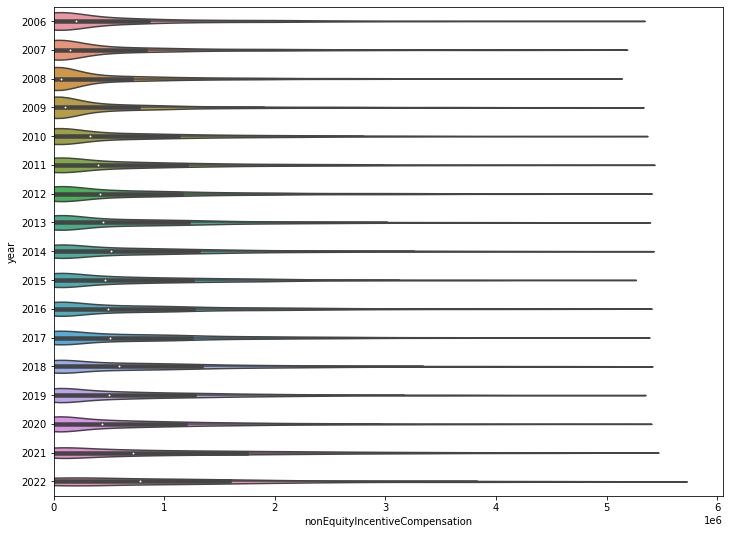

In [60]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.xlim(0,);

#### SCT Total

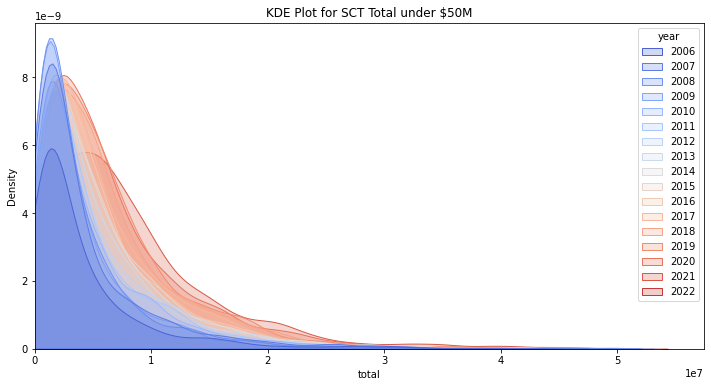

In [61]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['total'] < 50000000) & (ceo_df['total']>0)], 
            x='total',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for SCT Total under $50M')
plt.xlim(0,);

In [62]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.title('Boxplot of CEO SCT Total by Year');

In [63]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['total'] < 50000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'total')

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

In [64]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.xlim(0,);

In [65]:
print("Count of CEOs by year:")
print(starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum())

Count of CEOs by year:
year
2004       1
2005      53
2006    1435
2007    2001
2008    2063
2009    2026
2010    2061
2011    2115
2012    2187
2013    2330
2014    2382
2015    2446
2016    2531
2017    2674
2018    2797
2019    2949
2020    3040
2021    2813
2022     182
Name: CEO, dtype: int64


In [66]:
ceo_df['salary'].quantile(0.99)

2000000.0

In [67]:
ticker_series = starter_df.groupby('year')['ticker'].nunique()
ceo_series = starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum()

pd.DataFrame([ticker_series, ceo_series]).T

ticker   CEO
year              
2004       1     1
2005      49    53
2006    1196  1435
2007    1536  2001
2008    1576  2063
2009    1603  2026
2010    1634  2061
2011    1680  2115
2012    1742  2187
2013    1819  2330
2014    1890  2382
2015    1948  2446
2016    2018  2531
2017    2099  2674
2018    2205  2797
2019    2339  2949
2020    2519  3040
2021    2473  2813
2022     161   182

In [68]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
starter_df.drop(columns=['year','changeInPensionValueAndDeferredEarnings']).describe()

salary       bonus  stockAwards  optionAwards  \
count   172774      172774       172774        172774   
mean    481363      931896      1493095       1425116   
std     367194   149921671     55942801     184662312   
min          0           0            0             0   
25%     288000           0            0             0   
50%     412946           0       337822             0   
75%     600000        9002      1170596        332156   
max   20000000 52320562950  17980451374   49999911100   

       nonEquityIncentiveCompensation  otherCompensation      total  
count                          172774             172774     172774  
mean                           966832             441096    3292493  
std                          83971598           91501722   17040946  
min                                 0                  0          0  
25%                                 0               8560     785622  
50%                            180000              26206    1656949  
75%                            547858              80606    3532673  
max                       18771084337        37361610730 5682146331